## Import Libraries

In [582]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

In [583]:
#First, load the data
data = pd.read_excel(r'factors_dataset.xlsx', index_col='Sports')

print(data.shape)
print(data.columns)

(12, 14)
Index(['Ball lightness', 'Ball velocity', 'Field size/Ball size',
       'Goal size/Ball size', 'Ball bounciness', 'Player powerfulness',
       'Player ball handling', 'Player ball dispossession',
       'Player inexperience', 'Number of players/Field size',
       'Goal size/Number of players who can effectively defend the goal',
       'Scoring infrequency',
       'Number of rules about movement/Number of rules that prevent movement',
       'UAS'],
      dtype='object')


In [584]:
#Segregate numerical and categorical variables (if any)
numerical_vars = []
categorical_vars = []
for col in data.columns:
    if data[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']:
        numerical_vars.append(col)
    elif data[col].dtype == object:
        categorical_vars.append(col)
        
print('Numerical features: ', numerical_vars)

print('\nCategorical features: ',categorical_vars)

Numerical features:  ['Ball lightness', 'Ball velocity', 'Field size/Ball size', 'Goal size/Ball size', 'Ball bounciness', 'Player powerfulness', 'Player ball handling', 'Player ball dispossession', 'Player inexperience', 'Number of players/Field size', 'Goal size/Number of players who can effectively defend the goal', 'Scoring infrequency', 'Number of rules about movement/Number of rules that prevent movement', 'UAS']

Categorical features:  []


# PCA 

In [585]:
df = pd.DataFrame(data)
df

,Ball lightness,Ball velocity,Field size/Ball size,Goal size/Ball size,Ball bounciness,Player powerfulness,Player ball handling,Player ball dispossession,Player inexperience,Number of players/Field size,Goal size/Number of players who can effectively defend the goal,Scoring infrequency,Number of rules about movement/Number of rules that prevent movement,UAS
Sports,,,,,,,,,,,,,,
Soccer,0.376368,0.672065,0.069757,0.188416,0.8,0.009319,1.000000,0.907854,0.083333,0.009568,1.000000,1.000000,0.2352,0.33
Basketball,0.000000,0.000000,0.001261,0.000000,1.0,0.270217,0.056774,0.801768,0.250000,0.297301,0.000000,0.000000,0.2352,0.28
Volleyball,0.726477,0.744939,0.000000,1.000000,0.6,0.020497,0.188946,0.650289,0.000000,1.000000,0.749627,0.589969,0.0000,0.19
Handball,0.332604,0.406478,0.006057,0.073590,0.7,0.430937,0.056774,0.942828,0.600000,0.221805,0.023610,0.818912,0.0000,0.23
Ice Hockey,0.960613,1.000000,0.111639,0.232453,0.0,0.486130,0.000000,0.790547,0.908333,0.078757,0.098427,0.991500,0.5882,0.28
Cricket,0.968271,0.801619,1.000000,0.066003,0.4,0.000000,0.000000,0.000000,0.550667,0.000000,0.072807,0.829695,0.7529,0.16
Rugby,0.365427,0.089069,0.042112,0.126481,0.2,1.000000,0.324121,1.000000,1.000000,0.028826,0.038704,0.928100,0.9411,0.06
Futsal,0.398249,0.412955,0.005198,0.062224,0.7,0.193475,1.000000,0.846651,0.686667,0.153028,0.318939,0.949233,0.7529,0.18
Water Pollo,0.387309,0.348178,0.001311,0.009492,0.5,0.462655,0.056774,0.942828,0.500000,0.302044,0.129436,0.774884,0.4235,0.37


In [586]:
df.columns

Index(['Ball lightness', 'Ball velocity', 'Field size/Ball size',
       'Goal size/Ball size', 'Ball bounciness', 'Player powerfulness',
       'Player ball handling', 'Player ball dispossession',
       'Player inexperience', 'Number of players/Field size',
       'Goal size/Number of players who can effectively defend the goal',
       'Scoring infrequency',
       'Number of rules about movement/Number of rules that prevent movement',
       'UAS'],
      dtype='object')

In [587]:
pca = PCA()

In [588]:
# Normalization
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [589]:
df_scaled_upd = pd.DataFrame(df_scaled, columns=data.columns)
df_scaled = df_scaled_upd

In [590]:
df_scaled_complete = df_scaled # For correlation analysis

In [591]:
pca.fit(df_scaled)

PCA()

In [592]:
scores = pca.transform(df_scaled)

In [593]:
# Principal component loading vectors
# pca.components_

In [594]:
print('PVE: ',pca.explained_variance_ratio_)

PVE:  [3.08149576e-01 2.38040398e-01 1.43478215e-01 1.09434082e-01
 7.55648234e-02 6.93044964e-02 2.11174655e-02 1.83981621e-02
 8.83271320e-03 5.50962894e-03 2.17044034e-03 9.88749315e-33]


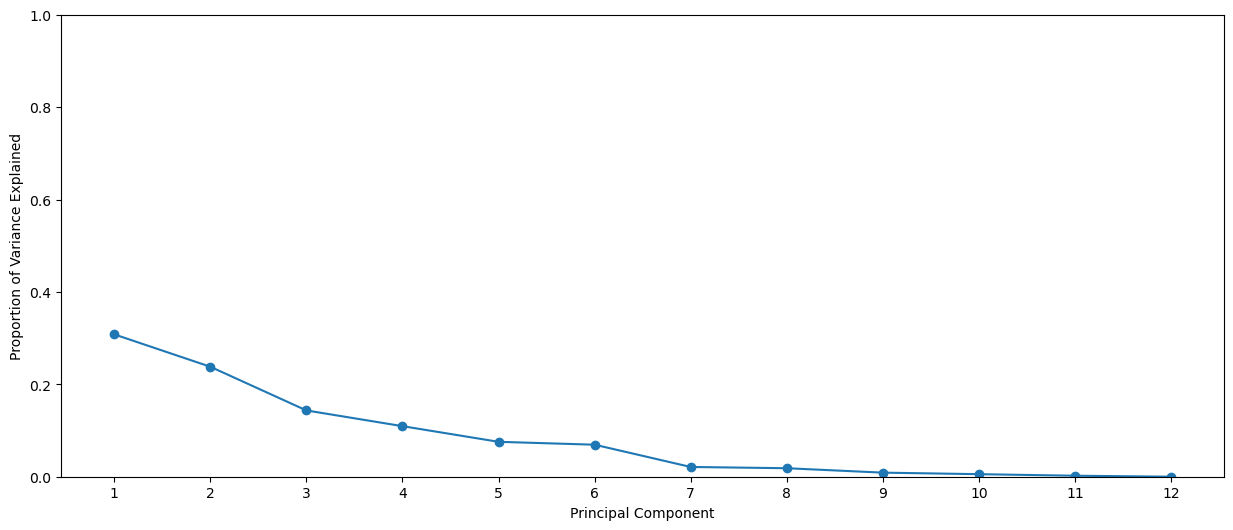

In [595]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))  

ticks = np.arange(pca.n_components_) + 1
ax.plot(ticks, pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)

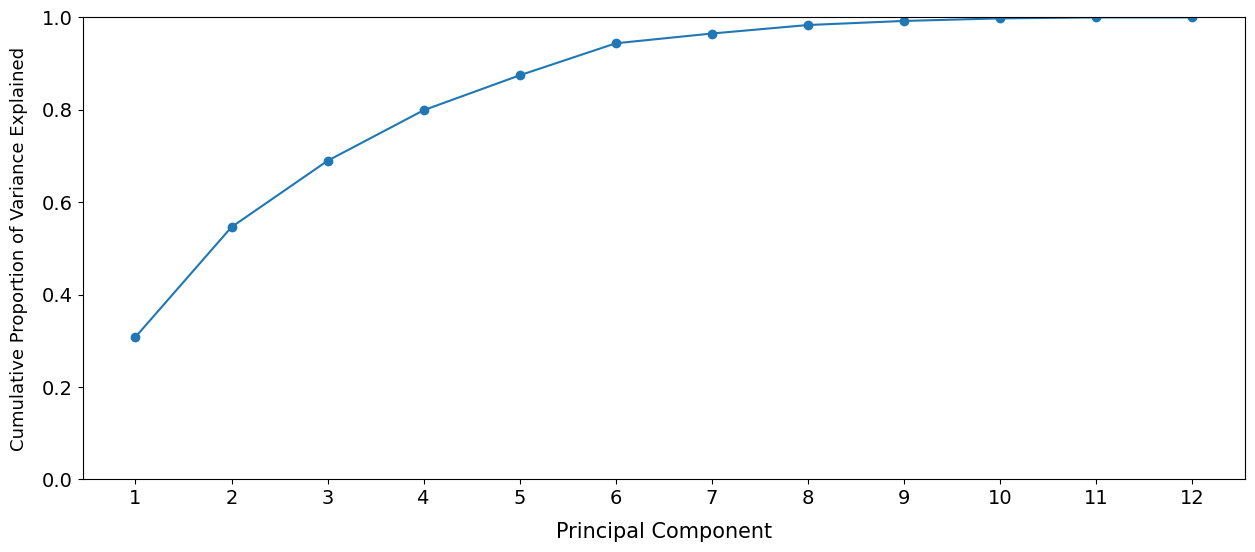

In [596]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))  

ticks = np.arange(pca.n_components_) + 1
ax.plot(ticks, pca.explained_variance_ratio_.cumsum(), marker='o')
ax.set_xlabel('Principal Component', fontsize=15, labelpad=10)
ax.set_ylabel('Cumulative Proportion of Variance Explained', fontsize=13, labelpad=10)
ax.set_ylim([0, 1])
ax.set_xticks(ticks)

# Increase font size of ticks
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

Let's create a dataframe named 'df_scores' based on the first two columns of 'scores' and set the column names to 'PC1' and 'PC2' ('df_scores' is the low-dimensional representation of our original dataset). 

In [597]:
df_scores = pd.DataFrame(scores[:, :2], columns=['PC1', 'PC2'])

In [598]:
df_scores

,PC1,PC2
0,0.965109,-0.159142
1,0.840193,0.731284
2,0.876014,-0.876382
3,0.264995,0.333557
4,-0.678087,-0.187481
5,-0.684828,-0.555854
6,-0.668655,0.956963
7,0.164559,0.428808
8,0.235786,0.424889
9,-0.227329,-0.536025


# Correlation

In [599]:
df = pd.DataFrame(data)
df.corr()

,Ball lightness,Ball velocity,Field size/Ball size,Goal size/Ball size,Ball bounciness,Player powerfulness,Player ball handling,Player ball dispossession,Player inexperience,Number of players/Field size,Goal size/Number of players who can effectively defend the goal,Scoring infrequency,Number of rules about movement/Number of rules that prevent movement,UAS
Ball lightness,1.000000,0.812927,0.568540,0.475806,-0.538819,-0.379418,-0.414850,-0.351519,0.455605,-0.153080,0.008501,0.549910,0.131369,-0.344360
Ball velocity,0.812927,1.000000,0.444615,0.426605,-0.320527,-0.522209,-0.113321,-0.388215,0.049581,-0.012235,0.336669,0.530215,-0.114411,0.006734
Field size/Ball size,0.568540,0.444615,1.000000,0.014689,-0.073557,-0.422654,-0.300333,-0.774843,0.173960,-0.379640,-0.159494,0.183487,0.103601,-0.227831
Goal size/Ball size,0.475806,0.426605,0.014689,1.000000,-0.070470,-0.436092,-0.164650,0.024120,-0.151480,0.531140,0.535433,0.089700,-0.464651,-0.028632
Ball bounciness,-0.538819,-0.320527,-0.073557,-0.070470,1.000000,-0.408440,0.313880,0.110967,-0.575122,0.199661,0.244613,-0.508452,-0.650520,0.200396
Player powerfulness,-0.379418,-0.522209,-0.422654,-0.436092,-0.408440,1.000000,-0.088039,0.396749,0.416198,-0.149046,-0.521345,0.036915,0.444554,-0.166182
Player ball handling,-0.414850,-0.113321,-0.300333,-0.164650,0.313880,-0.088039,1.000000,0.196310,-0.324139,-0.090956,0.601135,0.241097,0.115689,0.121724
Player ball dispossession,-0.351519,-0.388215,-0.774843,0.024120,0.110967,0.396749,0.196310,1.000000,0.219561,-0.050722,0.071073,0.119739,-0.214807,0.124945
Player inexperience,0.455605,0.049581,0.173960,-0.151480,-0.575122,0.416198,-0.324139,0.219561,1.000000,-0.618358,-0.611587,0.524909,0.488749,-0.478839
Number of players/Field size,-0.153080,-0.012235,-0.379640,0.531140,0.199661,-0.149046,-0.090956,-0.050722,-0.618358,1.000000,0.313186,-0.472131,-0.413323,0.101492


In [600]:
df_scaled_corr = df_scaled

In [601]:
df_scaled_corr.columns

Index(['Ball lightness', 'Ball velocity', 'Field size/Ball size',
       'Goal size/Ball size', 'Ball bounciness', 'Player powerfulness',
       'Player ball handling', 'Player ball dispossession',
       'Player inexperience', 'Number of players/Field size',
       'Goal size/Number of players who can effectively defend the goal',
       'Scoring infrequency',
       'Number of rules about movement/Number of rules that prevent movement',
       'UAS'],
      dtype='object')

In [602]:
df_scaled_corr = df_scaled_corr.rename(columns={'Goal size/Number of players who can effectively defend the goal': 'SS/NPS', 'Number of rules about movement/Number of rules that prevent movement': 'NRAM/NRPM'})

In [603]:
df_scaled_corr.corr()

,Ball lightness,Ball velocity,Field size/Ball size,Goal size/Ball size,Ball bounciness,Player powerfulness,Player ball handling,Player ball dispossession,Player inexperience,Number of players/Field size,SS/NPS,Scoring infrequency,NRAM/NRPM,UAS
Ball lightness,1.000000,0.812927,0.568540,0.475806,-0.538819,-0.379418,-0.414850,-0.351519,0.455605,-0.153080,0.008501,0.549910,0.131369,-0.344360
Ball velocity,0.812927,1.000000,0.444615,0.426605,-0.320527,-0.522209,-0.113321,-0.388215,0.049581,-0.012235,0.336669,0.530215,-0.114411,0.006734
Field size/Ball size,0.568540,0.444615,1.000000,0.014689,-0.073557,-0.422654,-0.300333,-0.774843,0.173960,-0.379640,-0.159494,0.183487,0.103601,-0.227831
Goal size/Ball size,0.475806,0.426605,0.014689,1.000000,-0.070470,-0.436092,-0.164650,0.024120,-0.151480,0.531140,0.535433,0.089700,-0.464651,-0.028632
Ball bounciness,-0.538819,-0.320527,-0.073557,-0.070470,1.000000,-0.408440,0.313880,0.110967,-0.575122,0.199661,0.244613,-0.508452,-0.650520,0.200396
Player powerfulness,-0.379418,-0.522209,-0.422654,-0.436092,-0.408440,1.000000,-0.088039,0.396749,0.416198,-0.149046,-0.521345,0.036915,0.444554,-0.166182
Player ball handling,-0.414850,-0.113321,-0.300333,-0.164650,0.313880,-0.088039,1.000000,0.196310,-0.324139,-0.090956,0.601135,0.241097,0.115689,0.121724
Player ball dispossession,-0.351519,-0.388215,-0.774843,0.024120,0.110967,0.396749,0.196310,1.000000,0.219561,-0.050722,0.071073,0.119739,-0.214807,0.124945
Player inexperience,0.455605,0.049581,0.173960,-0.151480,-0.575122,0.416198,-0.324139,0.219561,1.000000,-0.618358,-0.611587,0.524909,0.488749,-0.478839
Number of players/Field size,-0.153080,-0.012235,-0.379640,0.531140,0.199661,-0.149046,-0.090956,-0.050722,-0.618358,1.000000,0.313186,-0.472131,-0.413323,0.101492


<AxesSubplot:>

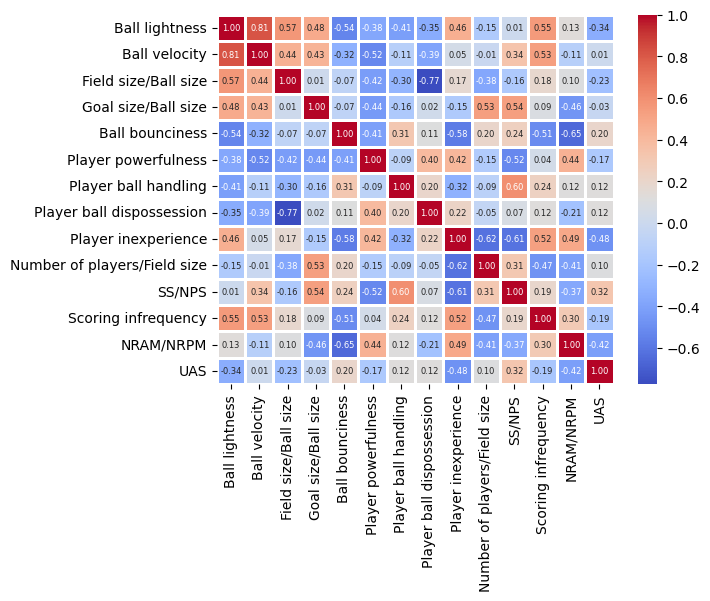

In [604]:
sns.heatmap(df_scaled_corr.corr(),cmap='coolwarm',linecolor='white',linewidths=1,annot=True,fmt='.2f',annot_kws={"size": 6}) #cmap='magma'

In [605]:
df_scores = pd.DataFrame(scores[:, :2], columns=['PC1', 'PC2'])

# Back to PCA

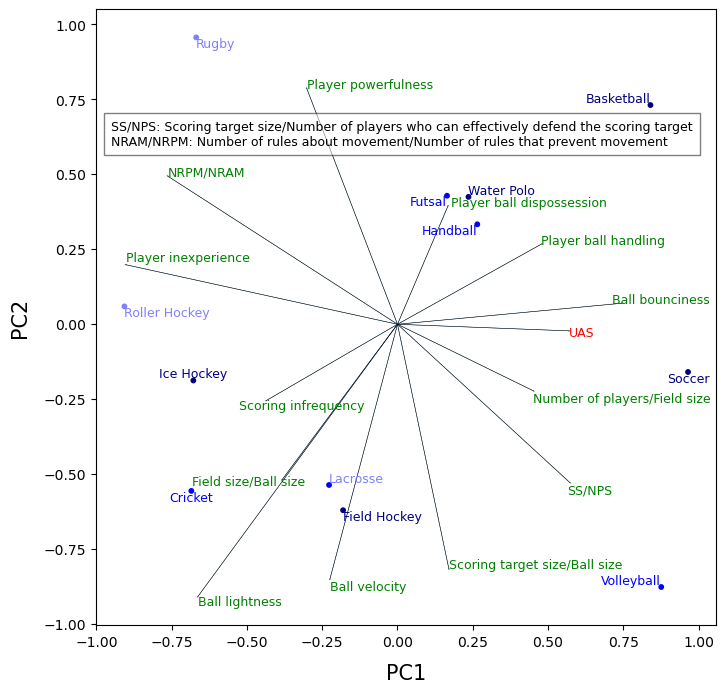

In [606]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

blue_light = (0.5, 0.5, 1.0)  # Light blue
blue_medium = (0.0, 0.0, 1.0)  # Medium blue
blue_dark = (0.0, 0.0, 0.5)    # Dark blue

colors = [blue_dark, blue_dark, blue_medium, blue_medium, blue_dark, \
          blue_medium, blue_light, blue_medium, blue_dark, blue_medium, blue_light, blue_dark]

ax.scatter(scores[:,0], scores[:,1], s=10, color=colors)

# Annotate each point with its label
labels = ['Soccer','Basketball','Volleyball','Handball','Ice Hockey',\
        'Cricket','Rugby','Futsal','Water Polo','Lacrosse','Roller Hockey','Field Hockey']

for label, x, y in zip(labels, scores[:, 0], scores[:, 1]):
    fontsize_val = 9
    if label=='Soccer':
        ax.text(x, y, label, fontsize=fontsize_val, ha='center', va='top', color=blue_dark)  # Adjust ha and va for label position
    elif label=='Futsal':
        ax.text(x, y, label, fontsize=fontsize_val, ha='right', va='top', color=blue_medium)  # Adjust ha and va for label position
    elif label=='Water Polo':
        ax.text(x, y, label, fontsize=fontsize_val, ha='left', va='bottom', color=blue_dark)  # Adjust ha and va for label position
    elif label=='Handball':
        ax.text(x, y, label, fontsize=fontsize_val, ha='right', va='top', color=blue_medium)  # Adjust ha and va for label position
    elif label=='Lacrosse':
        ax.text(x, y, label, fontsize=fontsize_val, ha='left', va='bottom', color=blue_light)  # Adjust ha and va for label position
    elif label=='Roller Hockey':
        ax.text(x, y, label, fontsize=fontsize_val, ha='left', va='top', color=blue_light)  # Adjust ha and va for label position
    elif label=='Rugby':
        ax.text(x, y, label, fontsize=fontsize_val, ha='left', va='top', color=blue_light)  # Adjust ha and va for label position
    elif label=='Cricket':
        ax.text(x, y, label, fontsize=fontsize_val, ha='center', va='top', color=blue_medium)  # Adjust ha and va for label position        
    elif label=='Field Hockey':
        ax.text(x, y, label, fontsize=fontsize_val, ha='left', va='top', color=blue_dark)  # Adjust ha and va for label position  
    elif label=='Ice Hockey':
        ax.text(x, y, label, fontsize=fontsize_val, ha='center', va='bottom', color=blue_dark)  # Adjust ha and va for label position 
    elif label=='Volleyball':
        ax.text(x, y, label, fontsize=fontsize_val, ha='right', va='bottom', color=blue_medium)  # Adjust ha and va for label position
    elif label=='Basketball':
        ax.text(x, y, label, fontsize=fontsize_val, ha='right', va='bottom', color=blue_dark)  # Adjust ha and va for label position
    else:    
        ax.text(x, y, label, fontsize=fontsize_val, ha='right', va='bottom', color='blue')  # Adjust ha and va for label position

ax.set_xlabel('PC%d' % (i+1), fontsize=15, labelpad=10)
ax.set_ylabel('PC%d' % (j+1), fontsize=15, labelpad=10)

# Annotate each factor with its label
arrow_scale = 2  # adjust the scale to control arrow length for better readability

adj_pos = np.array([[0,-0.03], #Ball lightness
                    [0,-0.04], #Ball velocity
                    [-0.3,-0.02], #Field size/Ball size
                    [0.00,0.00], #Goal size/Ball size
#                     [-0.25,-0.01], #Ball geometry
                    [-0.03,-0.00], #Ball bounciness
                    [0,0], #Player powerfulness
                    [0.00,-0.00], #Player ball handling
                    [0.01,0.00], #Player ball dispossession
                    [0,0.01], #Player inexperience
                    [-0.0,-0.04], #Number of players/Field size
                    [-0.01,-0.04], #Goal Size/Number of players who can effectively defend the goal
                    [-0.09,-0.03], #Scoring infrequency
                    [-0.0,0.00], #Number of rules about movement/Number of rules that prevent movement
                    [0,-0.02]]).T #UAS

color_list = [
              'green', #Ball Weight
              'green', #Ball Velocity
              'green', #Ball Size/Field Size
              'green', #Ball Size/Goal Size
#               'green', #Ball Geometry
              'green', #Ball Bounciness
              'green', #Player Powerfulness
              'green', #Player Ball Handling
              'green', #Player Ball Possession
              'green', #Player Experience
              'green', #Number of Players/Field Size
              'green', #Number of Players who can effectively defend the goal/Goal Size
              'green', #Scoring Frequency
              'green', #Number of rules about movement/Number of rules that prevent movement
              'red' #UAS
             ]

column_names = ['Ball lightness', 'Ball velocity', 'Field size/Ball size',
       'Scoring target size/Ball size', 'Ball bounciness',
       'Player powerfulness', 'Player ball handling',
       'Player ball dispossession', 'Player inexperience',
       'Number of players/Field size',
       'SS/NPS',
       'Scoring infrequency', 'NRPM/NRAM',
       'UAS']

for k in range(pca.components_.shape[1]):
    ax.arrow(0, 0, pca.components_[i, k] * arrow_scale, pca.components_[j, k] * arrow_scale, linewidth=0.2)
    ax.text(pca.components_[i, k] * arrow_scale + adj_pos[i,k],  # adjust the multiplier for arrow position
            pca.components_[j, k] * arrow_scale + adj_pos[j,k],  # adjust the multiplier for arrow position
            column_names[k], fontsize=9, color=color_list[k])  # adjust fontsize for better readability
    
# Define the text to be displayed in the framebox
text = "SS/NPS: Scoring target size/Number of players who can effectively defend the scoring target\n" + \
       "NRAM/NRPM: Number of rules about movement/Number of rules that prevent movement" 

# Create a framebox to display the text
ax.text(-0.95, 0.68, text, fontsize=9, ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5, pad=5))

plt.show()

# Now we repeat the analyses without UAS

In [607]:
#First, load the data
data = pd.read_excel(r'factors_dataset.xlsx', index_col='Sports')

print(data.shape)
print(data.columns)

(12, 14)
Index(['Ball lightness', 'Ball velocity', 'Field size/Ball size',
       'Goal size/Ball size', 'Ball bounciness', 'Player powerfulness',
       'Player ball handling', 'Player ball dispossession',
       'Player inexperience', 'Number of players/Field size',
       'Goal size/Number of players who can effectively defend the goal',
       'Scoring infrequency',
       'Number of rules about movement/Number of rules that prevent movement',
       'UAS'],
      dtype='object')


In [608]:
df = pd.DataFrame(data)
df = df.drop('UAS',axis=1)
df

,Ball lightness,Ball velocity,Field size/Ball size,Goal size/Ball size,Ball bounciness,Player powerfulness,Player ball handling,Player ball dispossession,Player inexperience,Number of players/Field size,Goal size/Number of players who can effectively defend the goal,Scoring infrequency,Number of rules about movement/Number of rules that prevent movement
Sports,,,,,,,,,,,,,
Soccer,0.376368,0.672065,0.069757,0.188416,0.8,0.009319,1.000000,0.907854,0.083333,0.009568,1.000000,1.000000,0.2352
Basketball,0.000000,0.000000,0.001261,0.000000,1.0,0.270217,0.056774,0.801768,0.250000,0.297301,0.000000,0.000000,0.2352
Volleyball,0.726477,0.744939,0.000000,1.000000,0.6,0.020497,0.188946,0.650289,0.000000,1.000000,0.749627,0.589969,0.0000
Handball,0.332604,0.406478,0.006057,0.073590,0.7,0.430937,0.056774,0.942828,0.600000,0.221805,0.023610,0.818912,0.0000
Ice Hockey,0.960613,1.000000,0.111639,0.232453,0.0,0.486130,0.000000,0.790547,0.908333,0.078757,0.098427,0.991500,0.5882
Cricket,0.968271,0.801619,1.000000,0.066003,0.4,0.000000,0.000000,0.000000,0.550667,0.000000,0.072807,0.829695,0.7529
Rugby,0.365427,0.089069,0.042112,0.126481,0.2,1.000000,0.324121,1.000000,1.000000,0.028826,0.038704,0.928100,0.9411
Futsal,0.398249,0.412955,0.005198,0.062224,0.7,0.193475,1.000000,0.846651,0.686667,0.153028,0.318939,0.949233,0.7529
Water Pollo,0.387309,0.348178,0.001311,0.009492,0.5,0.462655,0.056774,0.942828,0.500000,0.302044,0.129436,0.774884,0.4235


In [609]:
pca = PCA()

In [610]:
# Normalization
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [611]:
df_scaled_upd = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled = df_scaled_upd

In [612]:
pca.fit(df_scaled)

PCA()

In [613]:
scores = pca.transform(df_scaled)

In [614]:
# Principal component loading vectors
# pca.components_

In [615]:
print('PVE: ',pca.explained_variance_ratio_)

PVE:  [3.12887457e-01 2.58428856e-01 1.55781709e-01 1.18809447e-01
 7.99064130e-02 2.88021572e-02 2.01265497e-02 1.51143907e-02
 6.00988442e-03 3.89225556e-03 2.40880201e-04 1.02762704e-33]


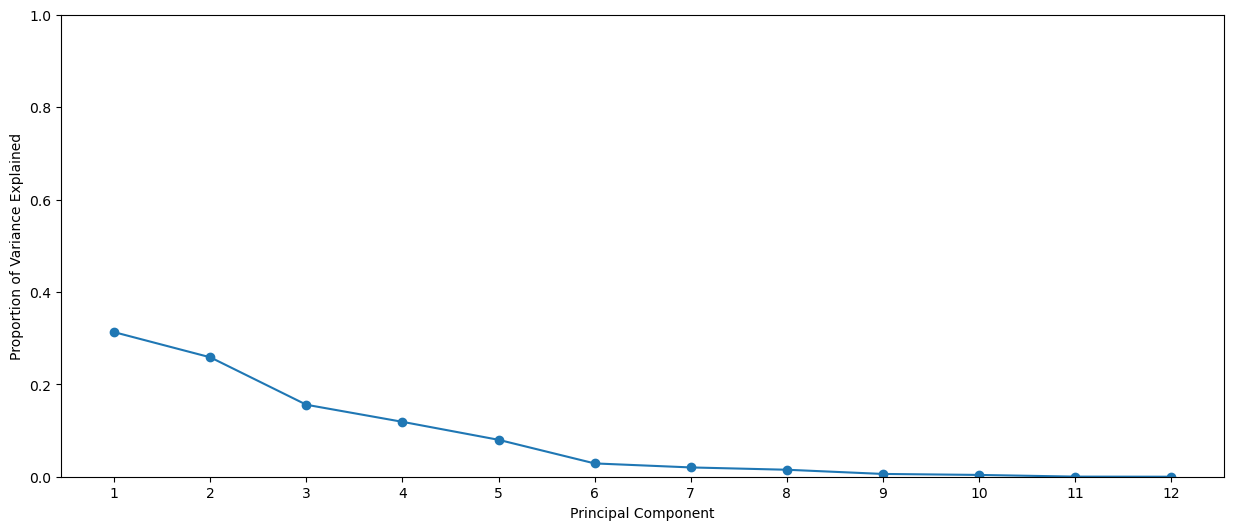

In [616]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))  

ticks = np.arange(pca.n_components_) + 1
ax.plot(ticks, pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)

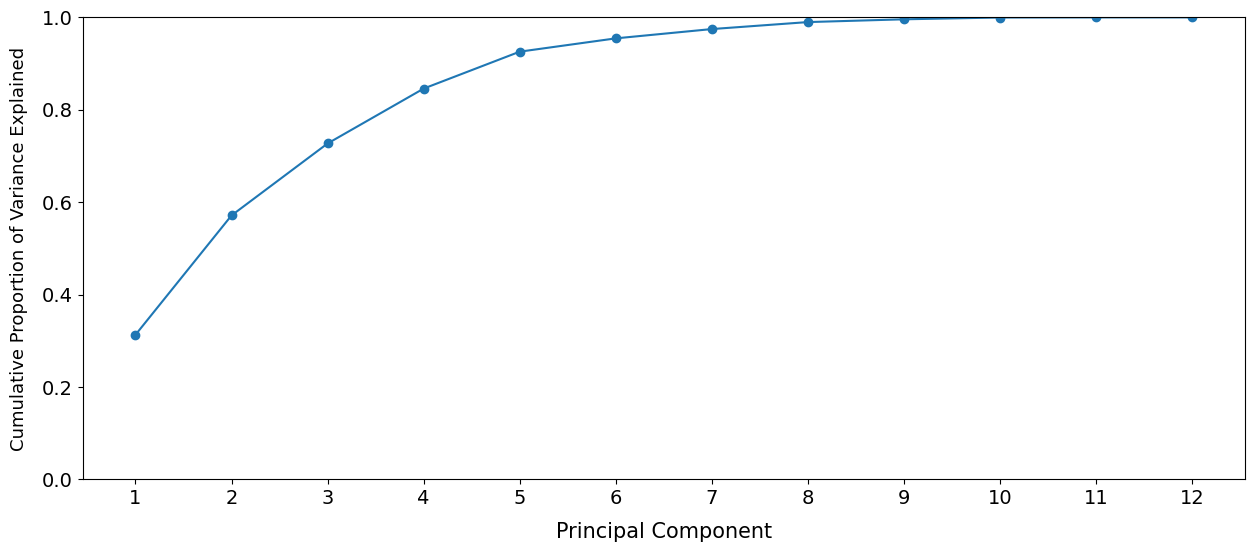

In [617]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))  

ticks = np.arange(pca.n_components_) + 1
ax.plot(ticks, pca.explained_variance_ratio_.cumsum(), marker='o')
ax.set_xlabel('Principal Component', fontsize=15, labelpad=10)
ax.set_ylabel('Cumulative Proportion of Variance Explained', fontsize=13, labelpad=10)
ax.set_ylim([0, 1])
ax.set_xticks(ticks)

# Increase font size of ticks
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

In [618]:
df_scores = pd.DataFrame(scores[:, :2], columns=['PC1', 'PC2'])
df_scores

,PC1,PC2
0,0.885518,-0.167697
1,0.821614,0.721586
2,0.927109,-0.891142
3,0.255187,0.330850
4,-0.782414,-0.173184
5,-0.673246,-0.547820
6,-0.544629,0.959859
7,0.210259,0.424463
8,0.098042,0.429217
9,-0.121564,-0.538848


In [619]:
# Recall that the principal components are only unique up to a sign change, so we can reproduce that figure by flipping the signs of the second set of scores and loadings.
# scores[:,1] *= -1
# pca.components_[1] *= -1 # flip the y-axis
# scores[:,0] *= -1
# pca.components_[0] *= -1 # flip the x-axis

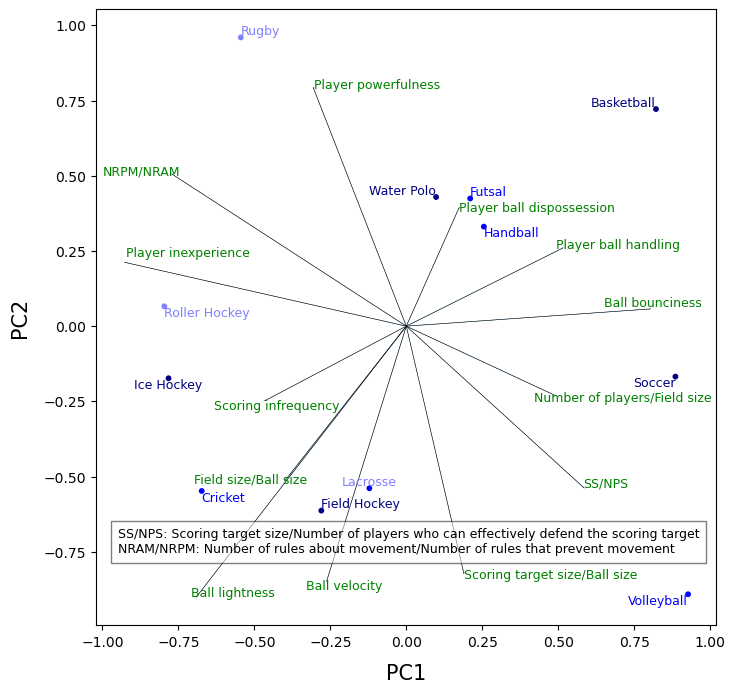

In [624]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

blue_light = (0.5, 0.5, 1.0)  # Light blue
blue_medium = (0.0, 0.0, 1.0)  # Medium blue
blue_dark = (0.0, 0.0, 0.5)    # Dark blue

colors = [blue_dark, blue_dark, blue_medium, blue_medium, blue_dark, \
          blue_medium, blue_light, blue_medium, blue_dark, blue_medium, blue_light, blue_dark]

ax.scatter(scores[:,0], scores[:,1], s=10, color=colors)

# Annotate each point with its label
labels = ['Soccer','Basketball','Volleyball','Handball','Ice Hockey',\
        'Cricket','Rugby','Futsal','Water Polo','Lacrosse','Roller Hockey','Field Hockey']
     
for label, x, y in zip(labels, scores[:, 0], scores[:, 1]):
    fontsize_val = 9
    if label=='Soccer':
        ax.text(x, y, label, fontsize=fontsize_val, ha='right', va='top', color=blue_dark)  # Adjust ha and va for label position
    elif label=='Futsal':
        ax.text(x, y, label, fontsize=fontsize_val, ha='left', va='bottom', color=blue_medium)  # Adjust ha and va for label position
    elif label=='Water Polo':
        ax.text(x, y, label, fontsize=fontsize_val, ha='right', va='bottom', color=blue_dark)  # Adjust ha and va for label position
    elif label=='Handball':
        ax.text(x, y, label, fontsize=fontsize_val, ha='left', va='top', color=blue_medium)  # Adjust ha and va for label position
    elif label=='Lacrosse':
        ax.text(x, y, label, fontsize=fontsize_val, ha='center', va='bottom', color=blue_light)  # Adjust ha and va for label position
    elif label=='Roller Hockey':
        ax.text(x, y, label, fontsize=fontsize_val, ha='left', va='top', color=blue_light)  # Adjust ha and va for label position
    elif label=='Rugby':
        ax.text(x, y, label, fontsize=fontsize_val, ha='left', va='bottom', color=blue_light)  # Adjust ha and va for label position
    elif label=='Cricket':
        ax.text(x, y, label, fontsize=fontsize_val, ha='left', va='top', color=blue_medium)  # Adjust ha and va for label position        
    elif label=='Field Hockey':
        ax.text(x, y, label, fontsize=fontsize_val, ha='left', va='bottom', color=blue_dark)  # Adjust ha and va for label position  
    elif label=='Ice Hockey':
        ax.text(x, y, label, fontsize=fontsize_val, ha='center', va='top', color=blue_dark)  # Adjust ha and va for label position 
    elif label=='Volleyball':
        ax.text(x, y, label, fontsize=fontsize_val, ha='right', va='top', color=blue_medium)  # Adjust ha and va for label position
    elif label=='Basketball':
        ax.text(x, y, label, fontsize=fontsize_val, ha='right', va='bottom', color=blue_dark)  # Adjust ha and va for label position
    else:    
        ax.text(x, y, label, fontsize=fontsize_val, ha='right', va='bottom', color='blue')  # Adjust ha and va for label position
                
ax.set_xlabel('PC%d' % (i+1), fontsize=15, labelpad=10)
ax.set_ylabel('PC%d' % (j+1), fontsize=15, labelpad=10)

# Annotate each factor with its label
arrow_scale = 2  # adjust the scale to control arrow length for better readability

adj_pos = np.array([[-0.02,0.00], #Ball lightness
                    [-0.07,-0.03], #Ball velocity
                    [-0.30,-0.01], #Ball size/Field size
                    [0,-0.02], #Ball size/Goal size
#                     [-0.25,-0.02], #Ball geometry
                    [-0.15,0.01], #Ball bounciness
                    [0,-0.00], #Player powerfulness
                    [-0.02,0], #Player ball handling
                    [0.00,-0.01], #Player ball dispossession
                    [0,0.02], #Player inexperience
                    [-0.07,-0.02], #Number of players/Field size
                    [0.00,0.00], #Number of players who can effectively defend the goal/Goal size
                    [-0.17,-0.03], #Scoring infrequency
                    [-0.23,-0.00], #Number of rules about movement/Number of rules that prevent movement 
                    [0,0]]).T #UAS

color_list = [
              'green', #Ball Weight
              'green', #Ball Velocity
              'green', #Ball Size/Field Size
              'green', #Ball Size/Goal Size
#               'green', #Ball Geometry
              'green', #Ball Bounciness
              'green', #Player Powerfulness
              'green', #Player Ball Handling
              'green', #Player Ball Possession
              'green', #Player Experience
              'green', #Number of Players/Field Size
              'green', #Number of Players who can effectively defend the goal/Goal Size
              'green', #Scoring Frequency
              'green', #Number of rules about movement/Number of rules that prevent movement 
              'red' #UAS
             ] 

column_names = ['Ball lightness', 'Ball velocity', 'Field size/Ball size',
       'Scoring target size/Ball size', 'Ball bounciness',
       'Player powerfulness', 'Player ball handling',
       'Player ball dispossession', 'Player inexperience',
       'Number of players/Field size',
       'SS/NPS',
       'Scoring infrequency', 'NRPM/NRAM',
       'UAS']

for k in range(pca.components_.shape[1]):
    ax.arrow(0, 0, pca.components_[i, k] * arrow_scale, pca.components_[j, k] * arrow_scale, linewidth=0.2)
    ax.text(pca.components_[i, k] * arrow_scale + adj_pos[i,k],  # adjust the multiplier for arrow position
            pca.components_[j, k] * arrow_scale + adj_pos[j,k],  # adjust the multiplier for arrow position
            column_names[k], fontsize=9, color=color_list[k])  # adjust fontsize for better readability
    
# Define the text to be displayed in the framebox
text = "SS/NPS: Scoring target size/Number of players who can effectively defend the scoring target\n" + \
       "NRAM/NRPM: Number of rules about movement/Number of rules that prevent movement"

# Create a framebox to display the text
ax.text(-0.95, -0.67, text, fontsize=9, ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5, pad=5))

plt.show()